# 석사학위 논문
* 학교 및 학과: University of Nottingham (UK), MSc Business Analytics
* 강의명: Data Driven Dissertation Project in Business Analytics
* 년도: 2020
* 사용 언어:Python
* 석사학위 논문: Decision-making for high-involvement products: Topic modelling using online reviews

### **논문 요약**
고 관여 상품 (소비자들이 의사결정과정에 관여를 많이 하는 제품)의 의사결정에 주요 주제가 무엇인지 토픽 모델링을 통해 분석한다. 고 관여 상품은 가격이 비싸거나, 쉽게 구매할 수 없는 등의 특징이 있고, 이 논문는 전기 자동차 브랜드 중 하나인 테슬라는 선택했다. 4 개의 온라인 사이트에서 총 965개의 리뷰 데이터를 수집했고, NLP 전처리 과정을 거친 후 LDA를 통해 10개의 주제를 파악했다.  

### **데이터 분석 과정**
1. 4개의 사이트에서 총 956개의 테슬라 리뷰 데이터 수집 (리뷰 및 별점)
2. URLs 및 HTML 제거
3. Pronouns를 그에 맞는 object name으로 대체 
4. 소문자로 변환 (‘Car’를 ‘car’로 변경)
5. Tokenisation
6. Part-of-speech (POS) tag를 통해 nouns, verbs, adverbs그리고 adjectives추출
7. Stop words 제거 (‘the’, ‘and’ 등)
8. 모델명 수정 (‘model’ + ‘x’ = ‘model_x’)
9. 부정 표현 대체 (‘no’, ‘nor’ 를 ‘not’으로)
10. Lemmatisation: POS tagging을 바탕으로 기본 단어로 변경
11. Bigram and trigram: 빈번한 단어 합치기
12. Stop words 제거

위 전처리 과정을 통해 10가지 주제를 파악했으며 이는 3가지 그룹으로 묶을 수 있다. 
* General discussion (features of vehicle, security, exterior, comparing brands)
* Technology (technology, electric car, high technology car)
* Service (delivery request, delivery process, mobile service)


# Dissertation
https://github.com/Chan-Young/Coursework/blob/main/NLP%20and%20LDA%20dissdertation.pdf

# **1. Data Scraping**
---

Sites
1. Cars.com
2. ComsumerAffair
3. Trustpilot 

##### https://www.cars.com/research/tesla/

In [ ]:
 import csv
 import requests
 from bs4 import BeautifulSoup

In [50]:
ratings = []
reviews = []

models = ['x',3, 's']
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

for model in models:
    for year in years:
        for page in range(1,11):
            url = 'https://www.cars.com/research/tesla-model_{}-{}/consumer-reviews/?pg={}&nr=10'.format(model,year,page)
            headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36','Accept-Encoding': 'gzip, deflate, br','Accept-Language': 'en-US,en;q=0.9,hi;q=0.8'}
            r = requests.get(url, headers=headers)
            soup = BeautifulSoup(r.text, 'html.parser')
    
            review_containers = soup.find_all('p', class_ = 'review-card-text')
            for review_container in review_containers:
                try:
                    review = review_container.text.replace("\n", " ")
                except:
                    review = ''
                reviews.append(review)

            containers=soup.find_all('article', attrs = {'ng-controller':'carsResearchConsumerReviewsReviewCardController as ctrl'})
            for container in containers:
                try:
                    rating = container.find('cars-star-rating').text
                    rating = rating[0]
                except:
                    rating = ''
                ratings.append(rating)

In [51]:
print(len(reviews))
print(len(ratings))

448
448


In [56]:
Cars_dic = {'Review':reviews, 'Rating':ratings}
Cars = pd.DataFrame(Cars_dic)
Cars.head()

,Review,Rating
0,This is a great electric SUV....,5
1,The Tesla Model X was one of ...,5
2,Definitely not a cheap vehicl...,5
3,Owned this car for a year and...,5
4,From the head turning falcon ...,5


In [58]:
Cars.Rating.value_counts()

5    396
4     23
1     16
3      7
2      6
Name: Rating, dtype: int64

In [59]:
Cars.to_csv(r'C:\Users\chanl\Untitled Folder\Cars.csv', index=False)

In [60]:
df = pd.read_csv('Cars.csv')
df.head()

,Review,Rating
0,This is a great electric SUV....,5
1,The Tesla Model X was one of ...,5
2,Definitely not a cheap vehicl...,5
3,Owned this car for a year and...,5
4,From the head turning falcon ...,5


# **2. Preprocessing**
---

## 0. Package preparation

In [1]:
# General
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import itertools
from collections import Counter

# Preprocessing
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords
import spacy

import neuralcoref
nlp = spacy.load('en')
neuralcoref.add_to_pipe(nlp, greedyness=0.5,max_dist=50,blacklist=False)
import gensim

In [2]:
cars = pd.read_csv('cars.csv')
print(len(cars))
print(cars.head())

448
                                              Review  Rating
0                   This is a great electric SUV....       5
1                   The Tesla Model X was one of ...       5
2                   Definitely not a cheap vehicl...       5
3                   Owned this car for a year and...       5
4                   From the head turning falcon ...       5


In [3]:
ca = pd.read_csv('Consumer_Affairs.csv')
print(len(ca))
print(ca.head())

206
                                              Review  Rating
0  Tesla decided they didn't like that I had a di...     1.0
1  Alliant is the finance company that the Tesla ...     1.0
2  Since December of 2019, my 2015 Tesla Model S ...     1.0
3  There is essentially no way to talk to a perso...     1.0
4  I got an alert to replace the small 12 V Batte...     1.0


In [4]:
t1 = pd.read_csv('Trustpilot1.csv')
print(len(t1))
print(t1.head())

63
                                              Review  Rating
0                   I bought a tesla 'demo' new c...     1.0
1                   Service at 6692 Auto Center D...     1.0
2                   Tesla service unacceptable,Ca...     1.0
3                   Blowed my husband on our two ...     4.0
4                   I’m so mad at Tesla. Although...     2.0


In [5]:
t2 = pd.read_csv('Trustpilot2.csv')
print(len(t2))
print(t2.head())

241
                                              Review  Rating
0                   I bought a tesla 'demo' new c...     1.0
1                   Tesla did not respond to this...     1.0
2                   Must admit tesla service has ...     1.0
3                   As of this morning, I think I...     1.0
4                   Where to start.  I picked up ...     1.0


In [6]:
raw_review = pd.concat([cars, ca, t1, t2])
print(raw_review.head())
print(len(raw_review))

                                              Review  Rating
0                   This is a great electric SUV....     5.0
1                   The Tesla Model X was one of ...     5.0
2                   Definitely not a cheap vehicl...     5.0
3                   Owned this car for a year and...     5.0
4                   From the head turning falcon ...     5.0
958


In [ ]:
raw_review.to_csv(r'C:\Users\chanl\Dissertation\raw_review.csv', index=False)

In [8]:
raw_review.isnull().sum(axis=0)

Review    8
Rating    7
dtype: int64

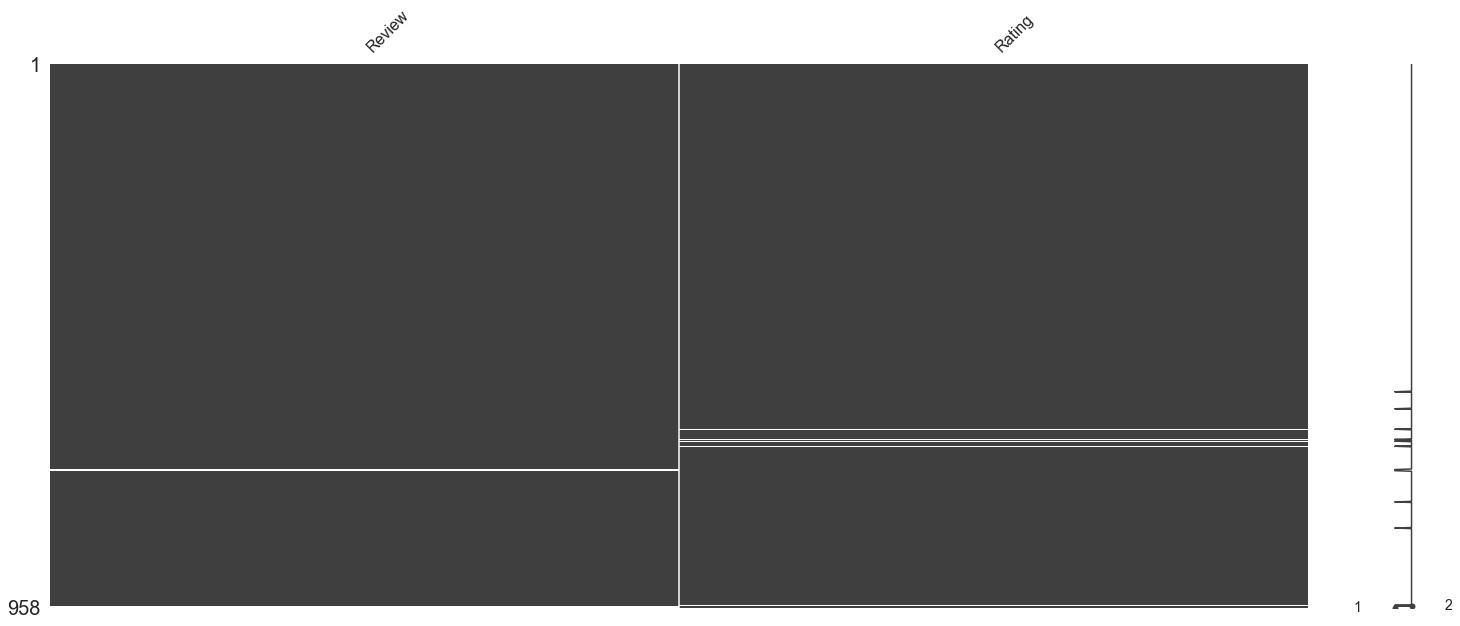

In [9]:
msno.matrix(raw_review)

In [10]:
raw_review = raw_review.dropna(axis=0)

In [ ]:
raw_review['Review'] = raw_review['Review'].str.strip()

In [12]:
raw_review.reset_index(drop=True)

,Review,Rating
0,This is a great electric SUV. Tesla has reall...,5.0
1,The Tesla Model X was one of the most over-eng...,5.0
2,Definitely not a cheap vehicle to purchase (ne...,5.0
3,Owned this car for a year and a half and is in...,5.0
4,From the head turning falcon wing doors to the...,5.0
...,...,...
938,Best Green Cars - Our Favorite Cars,1.0
939,Absolutely stunning service & great car!,4.0
940,I have owned a Model S 85D for 14 months and l...,5.0
941,good company and deciding to see if I want to ...,5.0


In [ ]:
raw_review.to_csv(r'C:\Users\chanl\Dissertation\review.csv', index=False)

In [13]:
# Step 1: Import dataset
Review = pd.read_csv('review.csv')
# Convert to array
docs =array(Review['Review'])
type(docs)

numpy.ndarray

## 2. replace all the pronouns in a text with their respective object names

In [14]:
def Pronoun(docs):
    for doc in range(len(docs)):
        review = nlp(docs[doc])
        # Step 2: Replacing pronouns to their object names
        resolved_coref = review._.coref_resolved
        docs[doc] = resolved_coref
    return docs

In [15]:
docs = Pronoun(docs)

In [ ]:
np.save('pronoun_final',docs)
#docs = np.load('pronoun_final.npy').tolist()

In [16]:
docs = docs.tolist()

## 3 ~ 5. Lowering case, tokenization, and POS tagging

In [17]:
def preprocessing(docs):
    key = []
    tokenizer = RegexpTokenizer(r'\w+')
    for doc in docs:
    # Step 3: Lower case
        doc = doc.lower()
    # Step 4: Tokenization
        doc = tokenizer.tokenize(doc)
    # Step 5: POS tagging
        tag = nltk.pos_tag(doc)
        text = []
        for i in tag:
            if i[1].startswith('V') or i[1].startswith('N') or i[1].startswith('R') \
            or i[1].startswith('J'):
                text.append(i[0])
            
        key.append(text)
    return(key)

In [18]:
docs_processed = preprocessing(docs)
print(len(docs_processed))
print(docs_processed[0])
print(len(docs_processed[0]))

943
['is', 'great', 'electric', 'suv', 'tesla', 'has', 'really', 'outdid', 'tesla', 'design', 'performance', 'technology', 'great', 'electric', 'suv', 'offers', 'have', 'model', 's', 'too', 'prefer', 'model', 's', 'model', 's', 'more', 'nimble', 'is', 'much', 'easier', 'car', 'get', 'compare', 'model', 's', 'model', 's', 'got', 'great', 'clearance', 'ground', 'model', 's', 'handles', 'great', 'heavy', 'suv', 'performance', 'incomparable', 'other', 'suv', 'model', 's', 'category', 'i', 'have', 'person', 'configuration', 'wish', 'i', 'ordered', 'person', 'more', 'cargo', 'space', 'being', 'second', 'row', 'fold', 'down', 'more', 'cargo', 'space', 'overall', 'i', 'think', 'is', 'great', 'car', 'fun', 'drive', 'reliable', 'get', 'notice', 'anywhere', 'everywhere']
86


## 6. Remove stop words

In [19]:
stop_words = stopwords.words('english')
stop_words.extend(['’', "'s", 't',"'ve",'x',"'m",'“','”','ve',\
                  '–', '..', '‘','…','r/','ev','•','**',"'re",'...'])
stop_words.remove('no')
stop_words.remove('nor')
stop_words.remove('not')
stop_words.remove('s')
stop_words.remove('x')

In [20]:
# Step 6: Remove stop words
docs_stopword = []
for doc in docs_processed:
    stop = [wd for wd in doc if wd not in stop_words]
    docs_stopword.append(stop)

In [21]:
print(docs_stopword[0])

['great', 'electric', 'suv', 'tesla', 'really', 'outdid', 'tesla', 'design', 'performance', 'technology', 'great', 'electric', 'suv', 'offers', 'model', 's', 'prefer', 'model', 's', 'model', 's', 'nimble', 'much', 'easier', 'car', 'get', 'compare', 'model', 's', 'model', 's', 'got', 'great', 'clearance', 'ground', 'model', 's', 'handles', 'great', 'heavy', 'suv', 'performance', 'incomparable', 'suv', 'model', 's', 'category', 'person', 'configuration', 'wish', 'ordered', 'person', 'cargo', 'space', 'second', 'row', 'fold', 'cargo', 'space', 'overall', 'think', 'great', 'car', 'fun', 'drive', 'reliable', 'get', 'notice', 'anywhere', 'everywhere']


## 7. Combine two words into a single word

In [22]:
show1 = []
word_1 = ['model','model']
word_2 = ['s','x']

for wd1 in word_1:
    for wd2 in word_2:
        for re in docs_stopword:
            for i,j in enumerate(re): 
                if j == wd1:
                    try: 
                        # Step 7: Combine two words into a single word
                        if re[i+1] == wd2:
                            re[i] = (wd1 + '_'+ wd2)
                            re.pop(i+1)
                            show1.append(re[i])
                    except:
                        pass
print(len(show1))
print(show1[:2])

316
['model_s', 'model_s']


## 8. Replacement common negatives of words by prefixing a 'not' to the token words that follow

In [23]:
show3 = []
negs = ['none', 'never','no',"n't",'not']

for re in docs_stopword:
    for i,j in enumerate(re):
        if j in negs:
            try:
                re[i] = 'not'
                # Step 8: Replacement common negative words
                re[i] = (re[i] + '_'+ re[i+1])
                re.pop(i+1)
                show3.append(re[i])
            except:
                pass
            
print(len(show3))
print(show3[:2])

911
['not_cheap', 'not_pay']


## 9. Lemmatization

In [24]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [25]:
# Step 9: Lemmatization
lemmatized = lemmatization(docs_stopword, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
np.save('lemmatized_final', lemmatized)
#lemmatized = np.load('lemmatized2.npy', allow_pickle=True).tolist()

In [27]:
print(lemmatized[5])

['perfect', 'combination', 'performance', 'intelligence', 'safety', 'healthiness', 's', 'actually', 'reliable', 'hear', 'issue', 'minor', 'easy', 'fix']


In [28]:
for doc in lemmatized:
    lemmatized = [[token for token in doc if len(token) > 2] for doc in lemmatized]

In [29]:
print(lemmatized[5])

['perfect', 'combination', 'performance', 'intelligence', 'safety', 'healthiness', 'actually', 'reliable', 'hear', 'issue', 'minor', 'easy', 'fix']


## 10. Bigram and trigram using genism

In [30]:
bigram = gensim.models.Phrases(lemmatized, min_count=10, threshold=5)
trigram = gensim.models.Phrases(bigram[lemmatized], threshold=5)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [31]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [32]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [33]:
# Step 10: Bigram and trigram
data_words_bigrams = make_bigrams(lemmatized)
data_words_trigrams = make_trigrams(lemmatized)

## 11. Remove stop words again

In [34]:
stop_words = stopwords.words('english')
stop_words.extend(['’', "'s", 't',"'ve",'x',"'m",'“','”','ve',\
                  '–', '..', '‘','…','r/','ev','•','**',"'re",'...'])

In [35]:
final = []
# Step 11: Remove stop words 
for i in data_words_trigrams:
    stop = [wd for wd in i if wd not in stop_words]
    final.append(stop)

In [36]:
final[5]

['perfect',
 'combination',
 'performance',
 'intelligence',
 'safety',
 'healthiness',
 'actually',
 'reliable',
 'hear',
 'issue',
 'minor',
 'easy',
 'fix']

In [ ]:
np.save('final_final', final)
#final = np.load('final_final.npy', allow_pickle=True).tolist()

In [37]:
all_words = list(itertools.chain(*final))
print(len(all_words))

counter = Counter(all_words)
print(len(counter))

46484
5251


In [38]:
w = dict(counter.most_common(40))

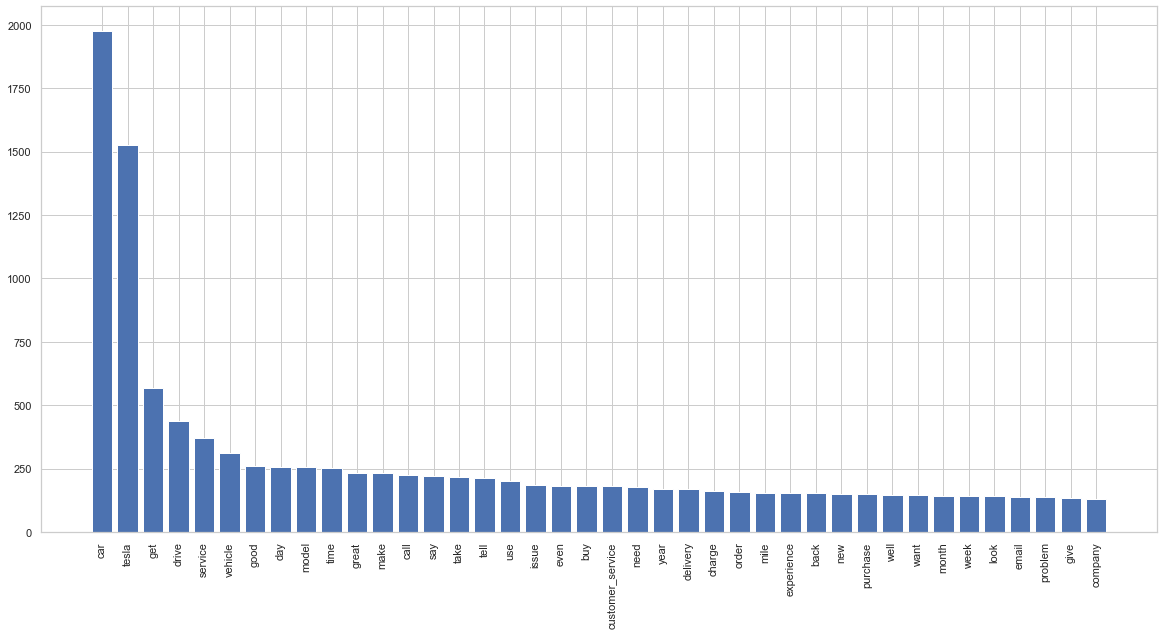

In [39]:
plt.figure(figsize=(20,10))
plt.bar(w.keys(), w.values())
plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

## Step 12: Proning

Removing rare and common tokens using Gensim's dictionary with filter_extremes.
Value pairs with less than 2 occurrence or more than 10% of total number of sample is removed.

# **3. LDA Analysis**
---

## 0. Package preparation

In [12]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array

# Modelling
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim import corpora
from gensim import models
from pprint import pprint
from gensim.models.coherencemodel import CoherenceModel
import tqdm

# Visualisation
import seaborn as sns
import pyLDAvis.gensim
import pickle 
import pyLDAvis

## 1. Data preparation for the LDA analysis

In [13]:
final = np.load('final_final.npy', allow_pickle=True).tolist()

In [14]:
final[0][:10]

['great',
 'electric',
 'suv',
 'tesla',
 'really',
 'outdid',
 'tesla',
 'design',
 'performance',
 'technology']

In [15]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(final)

# Step 12: Remove rare & common tokens 
# We filter our dict to remove key : 
#value pairs with less than 2 occurrence or more than 10% of total number of sample
dictionary.filter_extremes(no_below=2, no_above=0.1)

#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in final]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 2765
Number of documents: 943
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 4), (27, 1), (28, 1), (29, 1)]]


In [16]:
temp = dictionary[0]
id2word = dictionary.id2token

## 2. Base model of the LDA analysis

In [17]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=20,
                                       iterations=100,
                                       per_word_topics=True,
                                       eval_every=1,
                                       decay=0.5, 
                                       offset=64)

In [18]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"autopilot" + 0.007*"cost" + 0.007*"gas" + 0.006*"feature" + '
  '0.006*"handle" + 0.006*"much" + 0.006*"comfortable" + 0.006*"acceleration" '
  '+ 0.006*"seat" + 0.006*"interior"'),
 (1,
  '0.013*"appt" + 0.013*"sister" + 0.011*"part" + 0.010*"guy" + 0.009*"email" '
  '+ 0.008*"item" + 0.008*"uber" + 0.007*"tell_mobile_service" + 0.007*"right" '
  '+ 0.006*"arrive"'),
 (2,
  '0.013*"email" + 0.012*"delivery" + 0.008*"ask" + 0.007*"customer" + '
  '0.006*"pay" + 0.006*"people" + 0.006*"receive" + 0.006*"problem" + '
  '0.005*"phone" + 0.005*"sale"'),
 (3,
  '0.014*"tire" + 0.011*"delivery" + 0.008*"june" + 0.007*"appointment" + '
  '0.007*"scratch" + 0.007*"service_center" + 0.007*"price" + 0.006*"march" + '
  '0.005*"sale" + 0.005*"side"'),
 (4,
  '0.024*"tesla_solar_panel" + 0.011*"range" + 0.010*"add" + 0.010*"home" + '
  '0.009*"awesome" + 0.008*"already" + 0.008*"roof" + 0.008*"crap" + '
  '0.008*"update" + 0.007*"standard"'),
 (5,
  '0.015*"window" + 0.009*"customer

In [19]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=final, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3598303372904272


## 3. Hyper-parameter tuning

In [20]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=42,
                                           chunksize=100,
                                           passes=20,
                                           iterations=100,
                                           eval_every=1,
                                           decay=0.5, 
                                           offset=64,
                                           per_word_topics=True,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=final, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 10
max_topics = 101
step_size = 10
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [ ]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i],
                                                  dictionary=dictionary, k=k, a=a, b=b)
                    
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results_final.csv', index=False)
    pbar.close()

In [21]:
lda_tuning = pd.read_csv('lda_tuning_results_final.csv')
lda_tuning_100 = lda_tuning.groupby(lda_tuning.Validation_Set)
lda_tuning_100 = lda_tuning_100.get_group('100% Corpus')
lda_tuning_100 = lda_tuning_100.sort_values(by='Coherence', ascending=False)
lda_tuning_100.head(3)

,Validation_Set,Topics,Alpha,Beta,Coherence
358,100% Corpus,20,asymmetric,0.9099999999999999,0.429508
498,100% Corpus,70,0.9099999999999999,0.9099999999999999,0.424328
438,100% Corpus,50,0.9099999999999999,0.9099999999999999,0.422660


In [22]:
results = lda_tuning_100.groupby(lda_tuning_100.Alpha)
results = results.get_group('asymmetric')
results = results.groupby(results.Beta)
results = results.get_group('0.9099999999999999')

In [23]:
results

,Validation_Set,Topics,Alpha,Beta,Coherence
358,100% Corpus,20,asymmetric,0.9099999999999999,0.429508
478,100% Corpus,60,asymmetric,0.9099999999999999,0.419709
418,100% Corpus,40,asymmetric,0.9099999999999999,0.415211
328,100% Corpus,10,asymmetric,0.9099999999999999,0.389568
448,100% Corpus,50,asymmetric,0.9099999999999999,0.389249
388,100% Corpus,30,asymmetric,0.9099999999999999,0.379484
568,100% Corpus,90,asymmetric,0.9099999999999999,0.375514
538,100% Corpus,80,asymmetric,0.9099999999999999,0.371281
598,100% Corpus,100,asymmetric,0.9099999999999999,0.369199
508,100% Corpus,70,asymmetric,0.9099999999999999,0.368219


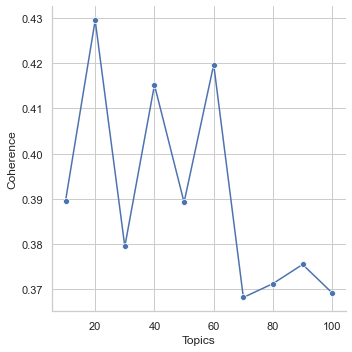

In [24]:
line = sns.relplot('Topics','Coherence', kind='line', marker='o', data=results)

## 4. Hyper-parameter tuning with narrowed range of the number of topics

In [25]:
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 10
max_topics = 51
step_size = 10
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [ ]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i],
                                                  dictionary=dictionary, k=k, a=a, b=b)
                    
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results_final2.csv', index=False)
    pbar.close()

In [26]:
lda_tuning2 = pd.read_csv('lda_tuning_results_final2.csv')
lda_tuning2_100 = lda_tuning2.groupby(lda_tuning2.Validation_Set)
lda_tuning2_100 = lda_tuning2_100.get_group('100% Corpus')
lda_tuning2_100 = lda_tuning2_100.sort_values(by='Coherence', ascending=False)
lda_tuning2_100.head(3)

,Validation_Set,Topics,Alpha,Beta,Coherence
168,100% Corpus,10,0.9099999999999999,0.9099999999999999,0.428507
177,100% Corpus,10,asymmetric,0.61,0.413098
258,100% Corpus,40,0.9099999999999999,0.9099999999999999,0.412249


In [27]:
results2 = lda_tuning2_100.groupby(lda_tuning2_100.Alpha)
results2 = results2.get_group('0.9099999999999999')
results2 = results2.groupby(results2.Beta)
results2 = results2.get_group('0.9099999999999999')

In [28]:
results2

,Validation_Set,Topics,Alpha,Beta,Coherence
168,100% Corpus,10,0.9099999999999999,0.9099999999999999,0.428507
258,100% Corpus,40,0.9099999999999999,0.9099999999999999,0.412249
288,100% Corpus,50,0.9099999999999999,0.9099999999999999,0.406163
198,100% Corpus,20,0.9099999999999999,0.9099999999999999,0.406116
228,100% Corpus,30,0.9099999999999999,0.9099999999999999,0.374115


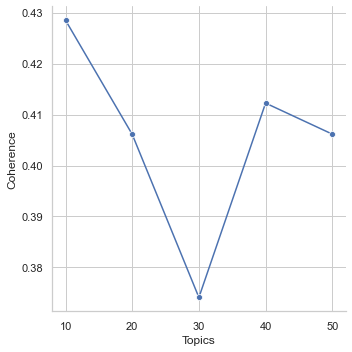

In [29]:
line2 = sns.relplot('Topics','Coherence', kind='line', marker='o',data=results2)

## 5. Final Model

In [30]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=42,
                                           chunksize=100,
                                           passes=20,
                                           iterations=100,
                                           eval_every=1,
                                           decay=0.5, 
                                           offset=64,
                                           per_word_topics=True,
                                           alpha=0.9099999999999999,
                                           eta=0.9099999999999999)

In [31]:
lda_model.print_topics()

[(0,
  '0.002*"ford" + 0.002*"smog_producer" + 0.001*"nothing" + 0.001*"gas" + 0.001*"ever" + 0.001*"honda" + 0.001*"friendly" + 0.001*"comfortable" + 0.001*"driving_experience" + 0.001*"manual"'),
 (1,
  '0.006*"appt" + 0.006*"part" + 0.005*"uber" + 0.005*"guy" + 0.004*"item" + 0.004*"arrive" + 0.004*"book" + 0.003*"tell_mobile_service" + 0.003*"pay" + 0.003*"right"'),
 (2,
  '0.010*"delivery" + 0.009*"email" + 0.008*"customer" + 0.007*"ask" + 0.006*"problem" + 0.006*"sale" + 0.006*"phone" + 0.005*"people" + 0.005*"bad" + 0.005*"someone"'),
 (3,
  '0.010*"june" + 0.008*"price" + 0.006*"march" + 0.006*"text" + 0.005*"customer" + 0.005*"promise" + 0.005*"trade" + 0.004*"delivery" + 0.004*"offer" + 0.004*"reserve"'),
 (4,
  '0.003*"oscar" + 0.003*"auto" + 0.002*"auburn_way" + 0.002*"high_tech_car" + 0.002*"thank" + 0.001*"patient" + 0.001*"help" + 0.001*"card" + 0.001*"professional" + 0.001*"steep"'),
 (5,
  '0.005*"bag" + 0.004*"police" + 0.003*"laptop" + 0.003*"return" + 0.003*"leave" 

## 6. Visualisation

In [32]:
pyLDAvis.enable_notebook()
LDAvis= pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

In [ ]:
LDAvis

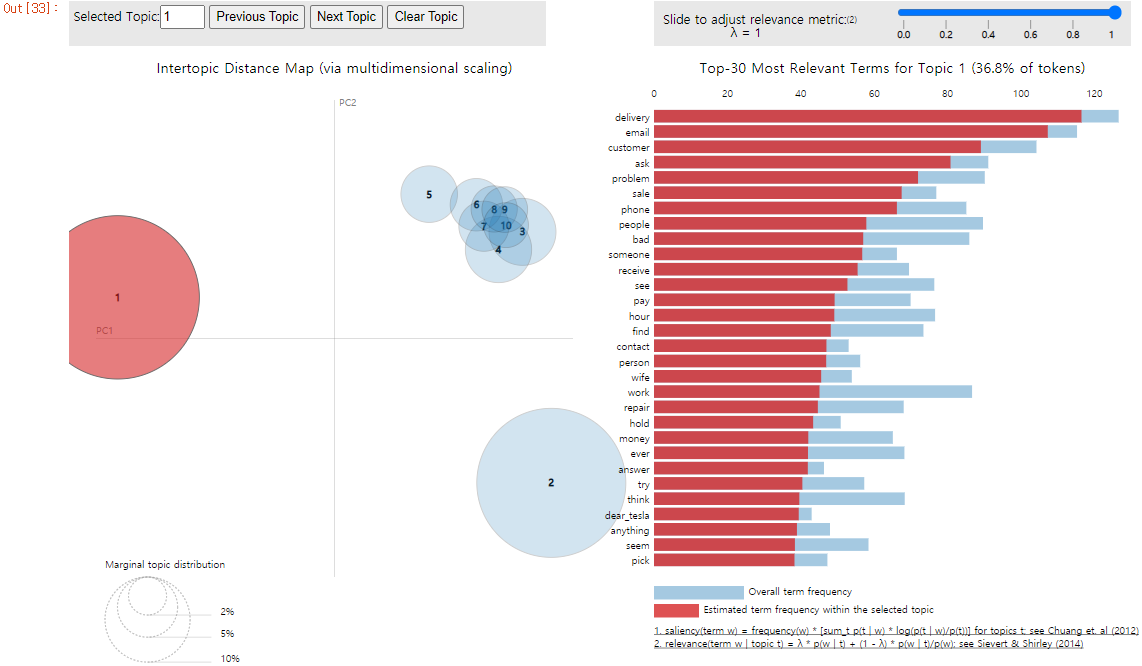

In [34]:
topic = [' Delivery request','General features','Technology','Eletric car',
         'Delivery process','Mobile service','Security',
        'Exterior look','High tech car','Comparing']
Percent_of_tokens = [36.9, 29.5, 7.1, 6, 4.2, 4, 3.6, 2.9, 2.9, 2.8]

In [35]:
Topic_percent = pd.DataFrame(list(zip(topic, Percent_of_tokens)), 
               columns =['Topic', 'Percent of tokens(%)']) 
Topic_percent

,Topic,Percent of tokens(%)
0,Delivery request,36.9
1,General features,29.5
2,Technology,7.1
3,Eletric car,6.0
4,Delivery process,4.2
5,Mobile service,4.0
6,Security,3.6
7,Exterior look,2.9
8,High tech car,2.9
9,Comparing,2.8


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

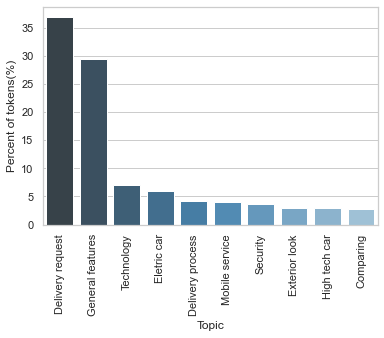

In [36]:
topic_percent = sns.barplot('Topic','Percent of tokens(%)',
                            palette='Blues_d', data=Topic_percent)
plt.xticks(rotation=90)